In [2]:
import pandas as pd
import os
import numpy as np
from scipy.signal import butter, filtfilt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from colorspacious import cspace_convert
import colorsys
import matplotlib

C:\Users\ljr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [21]:
path=r'C:\Users\ljr\Desktop\babyloggertest\13'
folder=os.listdir(path)
folder.sort()

In [22]:
def motionread(pathm,filesm):
    filesm.sort()
    motionx=np.zeros(93632*len(filesm))
    motiony=np.zeros(93632*len(filesm))
    motionz=np.zeros(93632*len(filesm))
    motionm=np.zeros(93632*len(filesm))
    for i in range(len(filesm)):
        df = pd.read_csv(pathm+'\\'+filesm[i], skiprows=18, header=None, sep=r'\s+')
        column_names=['time','gx','gy','gz','ax','ay','az']
        df.columns = column_names
        xx=np.zeros(93632)
        xx[:len(df['ax'])]=np.array(df['ax'])
        yy=np.zeros(93632)
        yy[:len(df['ay'])]=np.array(df['ay'])
        zz=np.zeros(93632)
        zz[:len(df['az'])]=np.array(df['az'])
        motionx[i*93632:(i+1)*93632]=xx
        motiony[i*93632:(i+1)*93632]=yy
        motionz[i*93632:(i+1)*93632]=zz
        output=np.c_[motionx,motiony, motionz]
    #motionm=(motionx**2+motiony**2+motionz**2)**0.5
    return output

In [23]:
#file1=os.listdir(path+'\\'+folder[0])
#path1=str(path+'\\'+folder[0])
#print(path1)
df = pd.read_csv(path+'\\'+folder[0], skiprows=18, header=None, sep=r'\s+')
column_names=['time','gx','gy','gz','ax','ay','az']
df.columns = column_names
xx=np.zeros(len(df['ax']))
xx[:len(df['ax'])]=np.array(df['ax'])
yy=np.zeros(len(df['ay']))
yy[:len(df['ay'])]=np.array(df['ay'])
zz=np.zeros(len(df['az']))
zz[:len(df['az'])]=np.array(df['az'])
output=np.c_[xx,yy, zz]

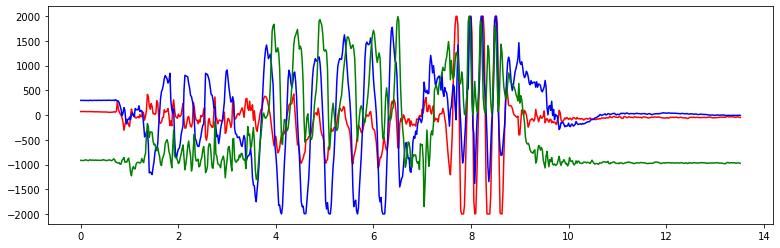

In [24]:
xlabel=np.arange(len(xx))/52
plt.figure(figsize=(13, 4))
plt.plot(xlabel,xx,c='r')
plt.plot(xlabel,yy,c='b')
plt.plot(xlabel,zz,c='g')

In [5]:
# Function to filter data with a Butterworth filter for each dimension
def butter_highpass_filter_3d(data, cutoff_frequency, sample_rate, order=2):
    filtered_data = np.zeros_like(data)
    for dim in range(3):
        nyquist = 0.5 * sample_rate
        normal_cutoff = cutoff_frequency / nyquist
        b, a = butter(order, normal_cutoff, btype='high', analog=False)
        filtered_data[:, dim] = filtfilt(b, a, data[:, dim])
    return filtered_data

In [6]:
sample_rate=52
filtered11 = butter_highpass_filter_3d(raw_data1, cutoff_frequency=0.01, sample_rate=sample_rate)

In [7]:
def score(datain):
    dataout=(datain[:,0]**2+datain[:,1]**2+datain[:,2]**2)**0.5
    return dataout

In [8]:
score11=score(filtered11)
ind=np.where(score11>5)[0]
scoreplot=score11[ind]
raw_plot=raw_data1[ind,:]

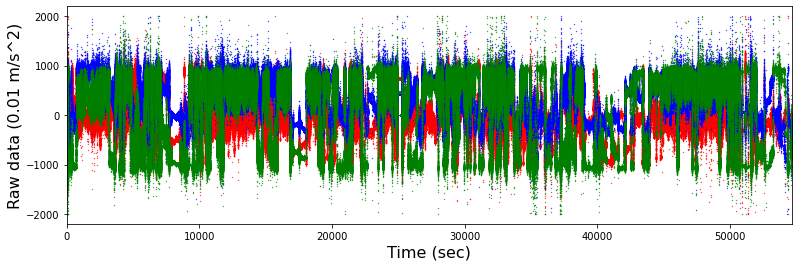

In [9]:
xx=np.arange(len(raw_plot[:,0]))
plt.figure(figsize=(13, 4))
plt.scatter(xx/52, raw_plot[:,0],s=0.1, color='r')
plt.scatter(xx/52, raw_plot[:,1],s=0.1, color='b')
plt.scatter(xx/52, raw_plot[:,2],s=0.1, color='g')
plt.xlim(np.min(xx/52),np.max(xx/52))
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
plt.xlabel('Time (sec)',fontsize=16)
plt.ylabel('Raw data (0.01 m/s^2)',fontsize=16)
plt.show()

Text(0, 0.5, 'Physical score')

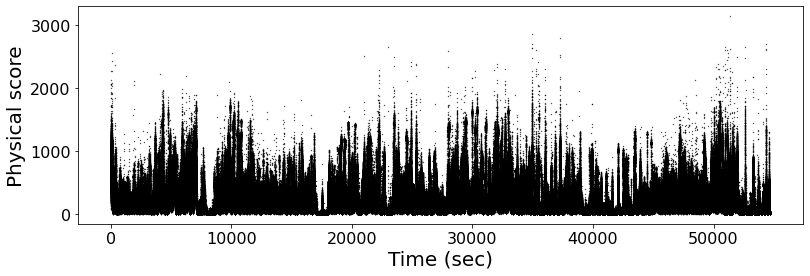

In [10]:
plt.figure(figsize=(13, 4))
plt.scatter(xx/52,scoreplot,s=0.1,c='k')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.xlabel('Time (sec)',fontsize=20)
plt.ylabel('Physical score',fontsize=20)